In [ ]:
#installing necessary Libraries
!pip install yfinance
!pip install pmdarima

     |████████████████████████████████| 5.5MB 6.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=1224aacafde6224f34f35979a43f6896cf3b48cba60ac9d56a66931ec8ab9c17
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 1.5MB 5.6MB/s 
     |████████████████████████████████| 9.5MB 14.6MB/s 
     |████████████████████████████████| 2.1MB 53.9MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [3]:
#Importing Libraries for Data Extraction ,Processing and EDA
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
key_hist=yf.Ticker("KEY")

In [5]:
key_data=key_hist.history(period='6MO')

In [6]:
key_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-07-23,11.692179,12.169609,11.594744,12.091661,9238900,0.0,0
2020-07-24,12.140379,12.306019,11.906536,11.935766,8281800,0.0,0
2020-07-27,11.848074,11.916278,11.672691,11.779870,10738500,0.0,0
2020-07-28,11.711666,11.887048,11.662949,11.682435,5918600,0.0,0
2020-07-29,11.643461,12.247557,11.585001,12.237814,11284400,0.0,0


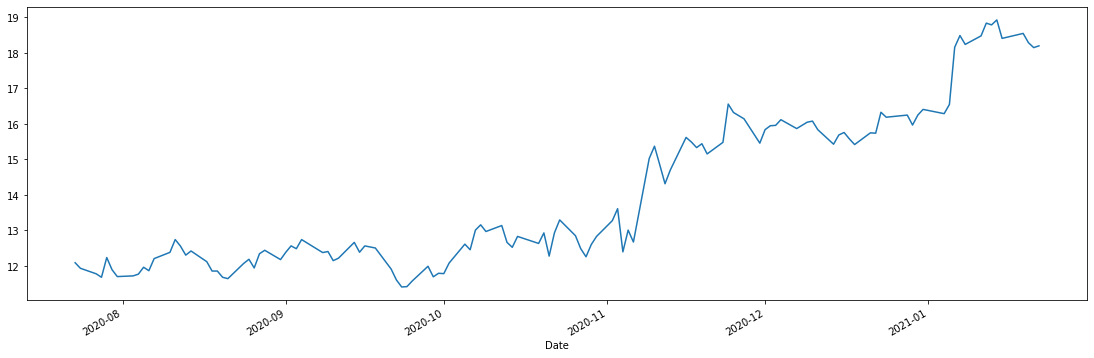

In [7]:
key_data.Close.plot(figsize=(19,6))

In [8]:
#Indexing to Business day to enable ETS Decomposition
key_data.resample('B').last()

In [9]:
key_data.index

DatetimeIndex(['2020-07-23', '2020-07-24', '2020-07-27', '2020-07-28',
               '2020-07-29', '2020-07-30', '2020-07-31', '2020-08-03',
               '2020-08-04', '2020-08-05',
               ...
               '2021-01-11', '2021-01-12', '2021-01-13', '2021-01-14',
               '2021-01-15', '2021-01-18', '2021-01-19', '2021-01-20',
               '2021-01-21', '2021-01-22'],
              dtype='datetime64[ns]', name='Date', length=132, freq='B')

In [10]:
key_data.dropna(inplace=True)

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [20]:
decomp=seasonal_decompose(key_data['Close'],model='add',period=20)

In [21]:
key_data.dropna(inplace=True)

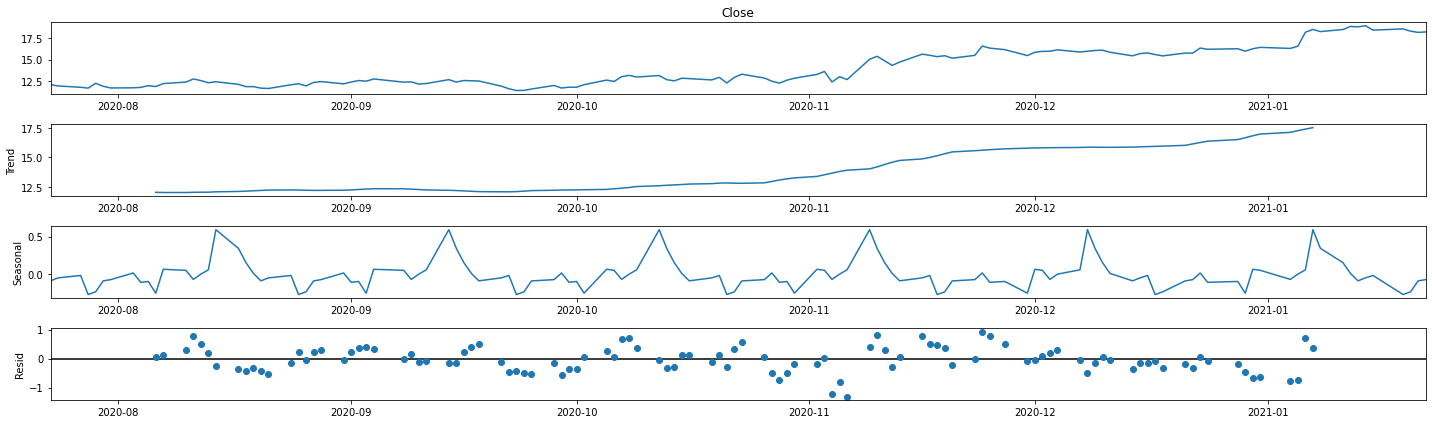

In [22]:
plt.rcParams["figure.figsize"]=(20,6)
decomp.plot();

Augmented Dickey Fuller Test to test the Stationarity Of Data

In [23]:
adfuller(key_data['Close'])

(0.33391301878676033,
 0.9788480025319835,
 3,
 123,
 {'1%': -3.4846672514209773,
  '10%': -2.5794629869786503,
  '5%': -2.8853397507076006},
 131.90268646495227)

In [24]:
from pmdarima import auto_arima

In [25]:
auto_arima(key_data['Close'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  127
Model:               SARIMAX(2, 1, 2)   Log Likelihood                 -61.525
Date:                Mon, 25 Jan 2021   AIC                            135.051
Time:                        05:11:01   BIC                            152.068
Sample:                             0   HQIC                           141.964
                                - 127                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0479      0.034      1.396      0.163      -0.019       0.115
ar.L1          0.8776      0.169      5.192      0.000       0.546       1.209
ar.L2         -0.8602      0.105     -8.222      0.000      -1.065      -0.655
ma.L1         -0.9760      0.181     -5.407      0.000      -1.330      -0.622
ma.L2          0.7895      0.170      4.636      0.000       0.456       1.123
sigma2         0.1549      0.013     12.245      0.000       0.130       0.180
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):               319.98
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               1.87   Skew:                             1.60
Prob(H) (two-sided):                  0.05   Kurtosis:                        10.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
len(key_data)

127

In [27]:
train_key=key_data.iloc[ :105]
test_key=key_data.iloc[105:]

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults

In [30]:
model=SARIMAX(train_key['Close'],order=(2,1,2))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [31]:
results=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [32]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  105
Model:               SARIMAX(2, 1, 2)   Log Likelihood                 -48.461
Date:                Mon, 25 Jan 2021   AIC                            106.923
Time:                        05:21:22   BIC                            120.145
Sample:                             0   HQIC                           112.279
                                - 105                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8924      0.163      5.462      0.000       0.572       1.213
ar.L2         -0.8744      0.093     -9.408      0.000      -1.057      -0.692
ma.L1         -1.0150      0.186     -5.450      0.000      -1.380      -0.650
ma.L2          0.8080      0.168      4.822      0.000       0.480       1.136
sigma2         0.1477      0.014     10.269      0.000       0.119       0.176
===================================================================================
Ljung-Box (L1) (Q):                   0.99   Jarque-Bera (JB):               239.70
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               4.40   Skew:                             1.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
start=len(train_key)
end=len(train_key)+len(test_key)-1

In [38]:
predictions=results.predict(start,end)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [44]:
print(predictions,test_key['Close'])

105    15.464091
106    15.536696
107    15.562931
108    15.522858
109    15.464157
110    15.446816
111    15.482668
112    15.529825
113    15.540557
114    15.508899
115    15.471265
116    15.465364
117    15.493005
118    15.522831
119    15.525277
120    15.501380
121    15.477916
122    15.477874
123    15.498352
124    15.516664
125    15.515098
126    15.497689
Name: predicted_mean, dtype: float64 Date
2020-12-21    15.750000
2020-12-22    15.740000
2020-12-23    16.330000
2020-12-24    16.190001
2020-12-28    16.250000
2020-12-29    15.970000
2020-12-30    16.250000
2020-12-31    16.410000
2021-01-04    16.290001
2021-01-05    16.549999
2021-01-06    18.160000
2021-01-07    18.490000
2021-01-08    18.240000
2021-01-11    18.480000
2021-01-12    18.840000
2021-01-13    18.790001
2021-01-14    18.930000
2021-01-15    18.410000
2021-01-19    18.549999
2021-01-20    18.290001
2021-01-21    18.150000
2021-01-22    18.200001
Name: Close, dtype: float64


In [39]:
from statsmodels.tools.eval_measures import rmse

In [41]:
rmse(predictions,test_key['Close'])

2.2491537496784164